# Effects of Different Learning Rates

## CS640

### U59844514 Xiankang Wu

### U37992938 Rongyu Wang


<p>      This code is about analyzing the effects of different learning rates applied to the NN.

<p>      <b>Check out our solutions to Problem 3 and 4 at the end.</b>

In [2]:
# Import Python libraries
import numpy as np    # numpy is the fundamental package for scientific computing with Python, such linear algebra, array...
import matplotlib.pyplot as plt      # matplotlib is a Python 2D plotting library which produces publication quality figures.
from sklearn.model_selection import KFold    #k-fold cross-validation

In [3]:
class LogisticRegression:
    """
    This lab implements a Logistic Regression Classifier.
    """
    #Here we need to add a parameter hidden_dim
    def __init__(self, input_dim, output_dim, hidden_dim):
        """
        Initializes the parameters of the logistic regression classifer to 
        random values.
        args:
            input_dim: Number of dimensions of the input data
            output_dim: Number of classes
            hidden_dim: Number of nodes in the hidden layer
        """
        #initialize a(1) and a(2) with random matrix(input_dim * hidden_dim)
        self.theta1 = np.random.randn(input_dim, hidden_dim) / np.sqrt(input_dim)       
        self.bias1 = np.zeros((1, hidden_dim))
        #initialize a(2) and a(3) with random matrix(hidden_dim * output_dim)
        self.theta2 = np.random.randn(hidden_dim, output_dim) / np.sqrt(hidden_dim) 
        self.bias2 = np.zeros((1, output_dim))
    #--------------------------------------------------------------------------
    
    #Not sure if needed:
    #def tanh_deriv(x):
        #return 1.0 - np.tanh(x)**2
    
    def compute_cost(self,X, y):
        """
        Computes the total cost on the dataset.

        args:
            X: Data array
            y: Labels corresponding to input data

        returns:
            cost: average cost per data sample
        """
        #Number of entries in .csv
        num_examples = np.shape(X)[0]
        # Hyperbolic tangent funcition as activation function
        z1 = np.dot(X,self.theta1) + self.bias1
        a = np.tanh(z1)
        z2 = np.dot(a, self.theta2) + self.bias2
        exp_z2 = np.exp(z2)
        
        #axis = 1: sum over rows
        #We can see that 0≤softmax_scores≤1. the values of softmax_scores can be considered as probabilities.
        #https://math.stackexchange.com/questions/2471528/understanding-the-softmax-function
        softmax_scores = exp_z2 / np.sum(exp_z2, axis=1, keepdims=True)
        one_hot_y = np.zeros((num_examples,np.max(y)+1))
        logloss = np.zeros((num_examples,))        
        for i in range(np.shape(X)[0]):
            one_hot_y[i,y[i]] = 1
            logloss[i] = -np.sum(np.log(softmax_scores[i,:]) * one_hot_y[i,:])
        data_loss = np.sum(logloss)
        return 1./num_examples * data_loss
    #--------------------------------------------------------------------------
    
    def predict(self,X):
        """
        Makes a prediction based on current model parameters.
        
        args:
            X: Data array
            
        returns:
            predictions: array of predicted labels
        """
        z1 = np.dot(X,self.theta1) + self.bias1
        a = np.tanh(z1)
        z2 = np.dot(a, self.theta2) + self.bias2
        exp_z2 = np.exp(z2)
        softmax_scores = exp_z2 / np.sum(exp_z2, axis=1, keepdims=True)
        predictions = np.argmax(softmax_scores, axis = 1)
        return predictions
    
    #--------------------------------------------------------------------------
    # implement logistic regression using gradient descent 
    # default learning rate = 0.01
    #--------------------------------------------------------------------------
    def fit(self,X,y,num_epochs,alpha=0.01):
        
        #Learns model parameters to fit the data.
        for epoch in range(0, num_epochs):
            
            # Forward propagation
            z1 = np.dot(X, self.theta1) + self.bias1
            a = np.tanh(z1)
            z2 = np.dot(a, self.theta2) + self.bias2
            exp_z2 = np.exp(z2)
            softmax_scores = exp_z2 / np.sum(exp_z2, axis=1, keepdims=True)                

            # Backpropagation
            beta1 = np.zeros_like(softmax_scores)
            one_hot_y = np.zeros_like(softmax_scores)
            for i in range(X.shape[0]):
                one_hot_y[i, y[i]] = 1
            beta2 = softmax_scores - one_hot_y
            
            # Compute gradients of model parameters
            dtheta2 = np.dot(a.T, beta2)
            dbias2 = np.sum(beta2, axis = 0, keepdims=True) 
            beta1 = np.dot(beta2, self.theta2.T) * (1 - np.power(a, 2))
            dtheta1 = np.dot(X.T, beta1)                                   
            dbias1 = np.sum(beta1, axis = 0)
            
            # Gradient descent parameter update
            # alpha is the learning rate
            self.theta2 -= alpha * dtheta2
            self.bias2  -= alpha * dbias2
            self.theta1 -= alpha * dtheta1
            self.bias1  -= alpha * dbias1
        return 0

In [4]:
 def plot_decision_boundary(model, X, y):
    """
    Function to print the decision boundary given by model.
    
    args:
        model: model, whose parameters are used to plot the decision boundary.
        X: input data
        y: input labels
    """
    
    x1_array, x2_array = np.meshgrid(np.arange(-10, 10, 0.01), np.arange(-10, 10, 0.01))
    grid_coordinates = np.c_[x1_array.ravel(), x2_array.ravel()]
    # Makes a prediction based on current model parameters.
    Z = model.predict(grid_coordinates)
    Z = Z.reshape(x1_array.shape)
    plt.contourf(x1_array, x2_array, Z, cmap=plt.cm.bwr)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, alpha = 0.05)
    plt.show()

In [5]:
def Confusion_matrix(X, y):
    acc = 0
    y_pred = logreg.predict(X)
    con_mat = np.zeros((output_dim, output_dim))
    for i in range(len(y_pred)):
        con_mat[y_pred[i], y[i]] += 1
        if y[i] == y_pred[i]: 
            acc += 1
    acc = acc*1.0/len(y_pred)
    
    return acc, con_mat

### Linear Data Training

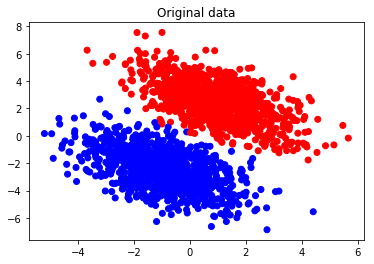

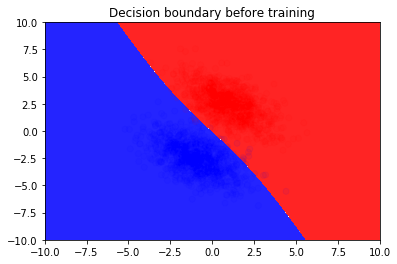

Decision boundary after training


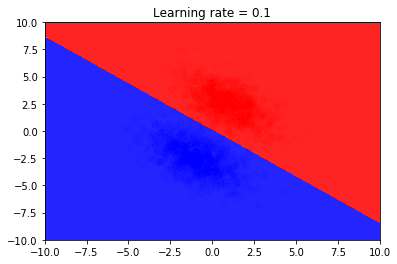

Confusion Matrix: 
 [[202.   0.]
 [  0. 198.]]
Accuracy: 1.0
Cost: 0.0013398393146281462 



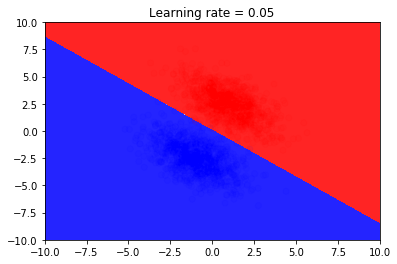

Confusion Matrix: 
 [[202.   0.]
 [  0. 198.]]
Accuracy: 1.0
Cost: 0.0013461291566658916 



In [6]:
#1. Load Data
X = np.genfromtxt('DATA/data_linearX.csv', delimiter=',') #https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html
y = np.genfromtxt('DATA/data_linearY.csv', delimiter=',').astype(np.int64)
#2. plot data
plt.title("Original data")
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr) #http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
plt.show()
#3. Initialize model
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
hidden_dim = 3
# hidden_dim added in the class initializer list. Indicating the number of hidden nodes
logreg = LogisticRegression(input_dim, output_dim, hidden_dim)
#4. Plot decision boundary
plt.title("Decision boundary before training")
plot_decision_boundary(logreg, X, y)
#5. Train the model with different learning rates
X_Origin = X
y_Origin = y
print ("Decision boundary after training")

kf = KFold(n_splits = 5)
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # train the model with 1000 epochs and learning rate = 0.001
    logreg.fit(X_train, y_train, 1000, alpha=0.1) 
    acc, con_mat = Confusion_matrix(X_test, y_test)
plt.title("Learning rate = 0.1")
plot_decision_boundary(logreg, X, y)
print ("Confusion Matrix: \n", con_mat)
print ("Accuracy:", acc)
print ("Cost:", logreg.compute_cost(X_test,y_test), "\n")

X = X_Origin
y = y_Origin
kf = KFold(n_splits = 5)
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # train the model with 1000 epochs and learning rate = 0.001
    logreg.fit(X_train, y_train, 1000, alpha=0.05) 
    acc, con_mat = Confusion_matrix(X_test, y_test)
plt.title("Learning rate = 0.05")
plot_decision_boundary(logreg, X, y)
print ("Confusion Matrix: \n", con_mat)
print ("Accuracy:", acc)
print ("Cost:", logreg.compute_cost(X_test,y_test), "\n")

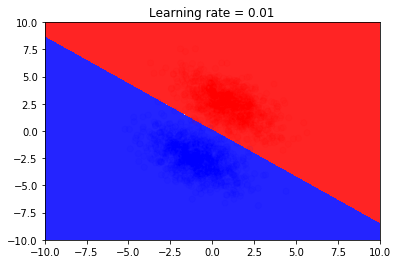

Confusion Matrix: 
 [[202.   0.]
 [  0. 198.]]
Accuracy: 1.0
Cost: 0.0013371206587758705 



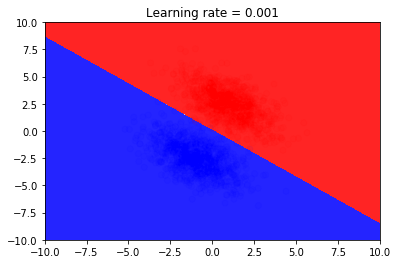

Confusion Matrix: 
 [[202.   0.]
 [  0. 198.]]
Accuracy: 1.0
Cost: 0.0013361674829683275 



In [7]:
X = X_Origin
y = y_Origin
kf = KFold(n_splits = 5)
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # train the model with 1000 epochs and learning rate = 0.001
    logreg.fit(X_train, y_train, 1000, alpha=0.01) 
    acc, con_mat = Confusion_matrix(X_test, y_test)
plt.title("Learning rate = 0.01")
plot_decision_boundary(logreg, X, y)
print ("Confusion Matrix: \n", con_mat)
print ("Accuracy:", acc)
print ("Cost:", logreg.compute_cost(X_test,y_test), "\n")

X = X_Origin
y = y_Origin
kf = KFold(n_splits = 5)
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # train the model with 1000 epochs and learning rate = 0.001
    logreg.fit(X_train, y_train, 1000, alpha=0.001) 
    acc, con_mat = Confusion_matrix(X_test, y_test)
plt.title("Learning rate = 0.001")
plot_decision_boundary(logreg, X, y)
print ("Confusion Matrix: \n", con_mat)
print ("Accuracy:", acc)
print ("Cost:", logreg.compute_cost(X_test,y_test), "\n")

### Non Linear Data Training

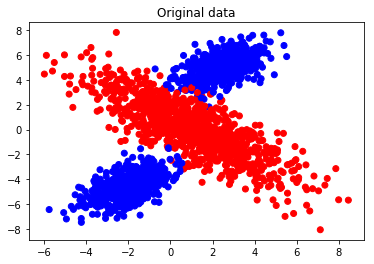

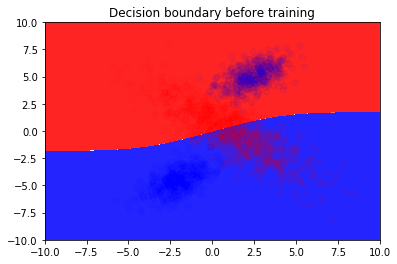

Decision boundary after training


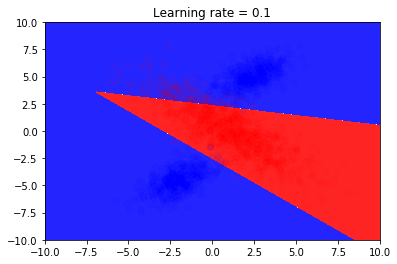

Confusion Matrix: 
 [[194.  31.]
 [  2. 173.]]
Accuracy: 0.9175
Cost: 0.9879343665187904 



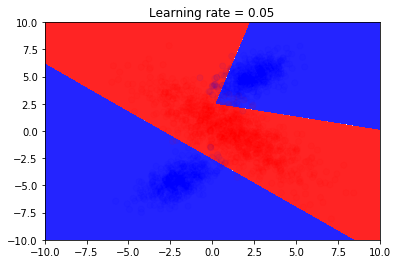

Confusion Matrix: 
 [[189.   4.]
 [  7. 200.]]
Accuracy: 0.9725
Cost: 1.1532888258218106 



In [7]:
#1. Load Data
X = np.genfromtxt('DATA/data_nonLinearX.csv', delimiter=',') #https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html
y = np.genfromtxt('DATA/data_nonLinearY.csv', delimiter=',').astype(np.int64)
#2. plot data
plt.title("Original data")
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr) #http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
plt.show()
#3. Initialize model
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
hidden_dim = 3
# hidden_dim added in the class initializer list. Indicating the number of hidden nodes
logreg = LogisticRegression(input_dim, output_dim, hidden_dim)
#4. Plot decision boundary
plt.title("Decision boundary before training")
plot_decision_boundary(logreg, X, y)
#5. Train the model with different learning rates
X_Origin = X
y_Origin = y
print ("Decision boundary after training")

kf = KFold(n_splits = 5)
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # train the model with 1000 epochs and learning rate = 0.001
    logreg.fit(X_train, y_train, 1000, alpha=0.1) 
    acc, con_mat = Confusion_matrix(X_test, y_test)
plt.title("Learning rate = 0.1")
plot_decision_boundary(logreg, X, y)
print ("Confusion Matrix: \n", con_mat)
print ("Accuracy:", acc)
print ("Cost:", logreg.compute_cost(X_test,y_test), "\n")

X = X_Origin
y = y_Origin
kf = KFold(n_splits = 5)
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # train the model with 1000 epochs and learning rate = 0.001
    logreg.fit(X_train, y_train, 1000, alpha=0.05) 
    acc, con_mat = Confusion_matrix(X_test, y_test)
plt.title("Learning rate = 0.05")
plot_decision_boundary(logreg, X, y)
print ("Confusion Matrix: \n", con_mat)
print ("Accuracy:", acc)
print ("Cost:", logreg.compute_cost(X_test,y_test), "\n")
    
# logreg.fit(X,y,1000,alpha=0.1)
# plt.title("Learning rate = 0.1")
# plot_decision_boundary(logreg, X, y)
# acc, con_mat = Confusion_matrix(X, y)
# print ("Confusion Matrix: \n", con_mat)
# print ("Accuracy:", acc)
# print ("Cost:", logreg.compute_cost(X,y), "\n")

# X = X_Origin
# y = y_Origin
# logreg.fit(X,y,1000,alpha=0.05)
# plt.title("Learning rate = 0.05")
# plot_decision_boundary(logreg, X, y)
# acc, con_mat = Confusion_matrix(X, y)
# print ("Confusion Matrix: \n", con_mat)
# print ("Accuracy:", acc)
# print ("Cost:", logreg.compute_cost(X,y), "\n")

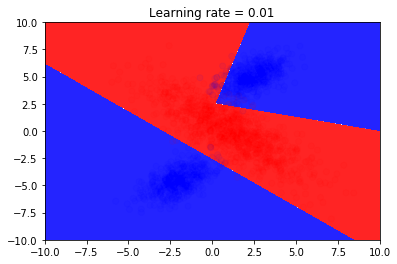

Confusion Matrix: 
 [[189.   4.]
 [  7. 200.]]
Accuracy: 0.9725
Cost: 0.10778149723096508 



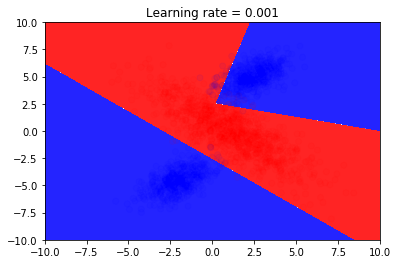

Confusion Matrix: 
 [[189.   4.]
 [  7. 200.]]
Accuracy: 0.9725
Cost: 0.107779411435376 



In [8]:
X = X_Origin
y = y_Origin
kf = KFold(n_splits = 5)
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # train the model with 1000 epochs and learning rate = 0.001
    logreg.fit(X_train, y_train, 1000, alpha=0.01) 
    acc, con_mat = Confusion_matrix(X_test, y_test)
plt.title("Learning rate = 0.01")
plot_decision_boundary(logreg, X, y)
print ("Confusion Matrix: \n", con_mat)
print ("Accuracy:", acc)
print ("Cost:", logreg.compute_cost(X_test,y_test), "\n")


X = X_Origin
y = y_Origin
kf = KFold(n_splits = 5)
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # train the model with 1000 epochs and learning rate = 0.001
    logreg.fit(X_train, y_train, 1000, alpha=0.001) 
    acc, con_mat = Confusion_matrix(X_test, y_test)
plt.title("Learning rate = 0.001")
plot_decision_boundary(logreg, X, y)
print ("Confusion Matrix: \n", con_mat)
print ("Accuracy:", acc)
print ("Cost:", logreg.compute_cost(X_test,y_test), "\n")
# X = X_Origin
# y = y_Origin
# logreg.fit(X,y,1000,alpha=0.01)
# plt.title("Learning rate = 0.01")
# plot_decision_boundary(logreg, X, y)
# acc, con_mat = Confusion_matrix(X, y)
# print ("Confusion Matrix: \n", con_mat)
# print ("Accuracy:", acc)
# print ("Cost:", logreg.compute_cost(X,y), "\n")

# X = X_Origin
# y = y_Origin
# logreg.fit(X,y,1000,alpha=0.001)
# plt.title("Learning rate = 0.001")
# plot_decision_boundary(logreg, X, y)
# acc, con_mat = Confusion_matrix(X, y)
# print ("Confusion Matrix: \n", con_mat)
# print ("Accuracy:", acc)
# print ("Cost:", logreg.compute_cost(X,y), "\n")

## Problem 3: The effect of learning rate

<p> Based on our trained neural network, we applied different learning rates on both linear on non-linear data.
    
<P> The learning rates we selected are: 0.1, 0.05, 0.01 and 0.001 respectively. The smaller learning rate is, the slower the weights within the net are adjusted and updated. According to the plotted graph and data derived, we found that from 0.1 down to 0.05, there was a significant improvement in performace, but for rates smaller, the improvement was much smaller.

## Problem 4: Overfitting

<p> Overfitting is a modeling error, when a trained model doesn’t generalize well from its training data to unseen test data. It may occur when number of epochs is too high, or there are too many number of nodes in the hidden layers than necessary.

<p> Ways to reduce overfitting

- Apply cross validation. It prevents overfitting by spliting training set into smaller sets and treat other sets as unseen test sets, so that it provides a way to prevent overfitting on the training set.
- Select more training data. Add more relevent and clean training sets to help the algorithm detect the pattern we wish to learn from the data(which is called signal) better.
- Perform feature selection: We can manually improve the generalizability by removing irrelevant input features. Some algorithms have built-in feature selection.
- Regularization. As the L2 regularization we implemented, this method helps simply the model. It works better if we also apply cross validation. 
     
Our reference:
https://elitedatascience.com/machine-learning-iteration#micro